In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['database.sqlite', 'Iris.csv']


   Explore Data 

In [2]:
data = pd.read_csv("../input/Iris.csv")

In [3]:
data.head(2)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa


In [4]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


Drop the unneccessary Data 

In [5]:
data.drop('Id',axis=1, inplace= True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [7]:
data['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

Data Visualization 

Pair Plot

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


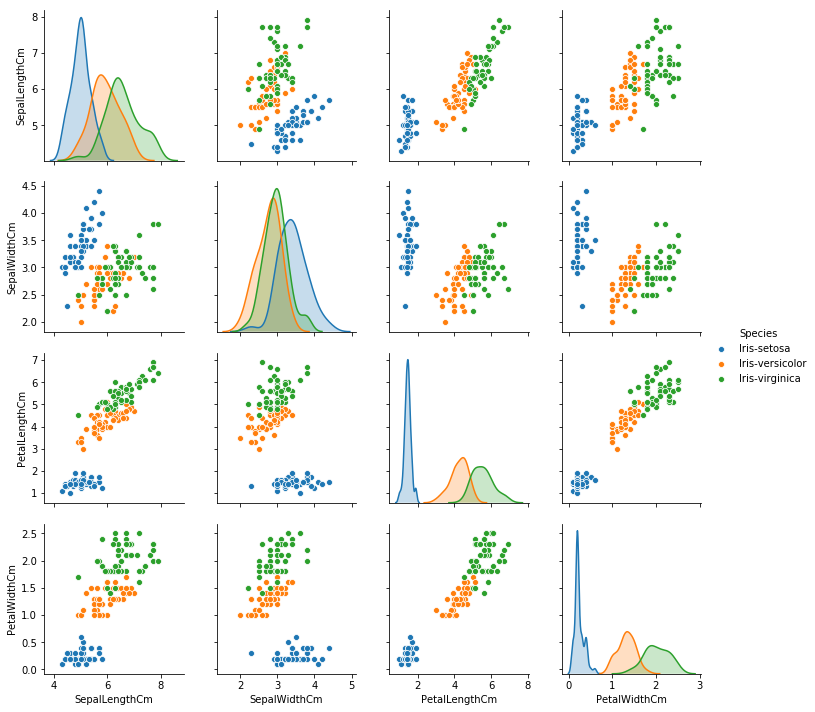

In [9]:

g = sns.pairplot(data, hue='Species')
plt.show()

Violin Plot

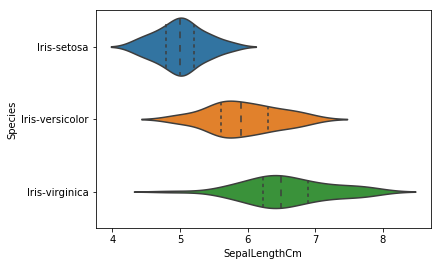

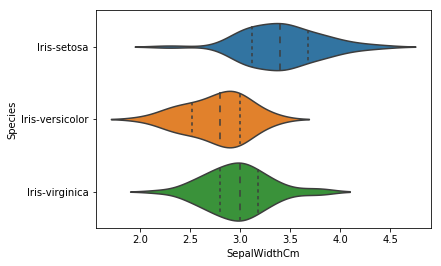

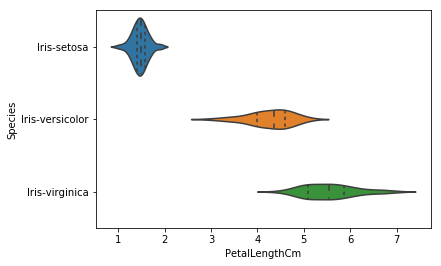

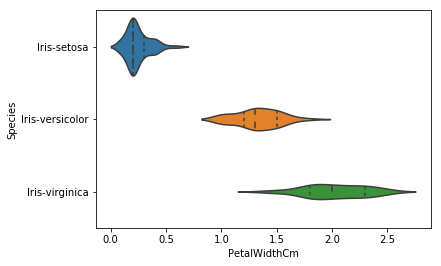

In [10]:

g = sns.violinplot(y='Species', x='SepalLengthCm', data=data, inner='quartile')
plt.show()
g = sns.violinplot(y='Species', x='SepalWidthCm', data=data, inner='quartile')
plt.show()
g = sns.violinplot(y='Species', x='PetalLengthCm', data=data, inner='quartile')
plt.show()
g = sns.violinplot(y='Species', x='PetalWidthCm', data=data, inner='quartile')
plt.show()




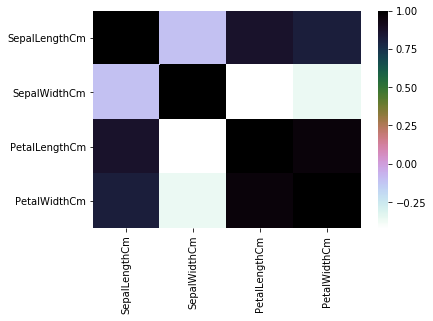

In [11]:
sns.heatmap(data.corr(),cmap= 'cubehelix_r') #Always convert data to data.corr()

The Sepal width and Sepal length are not correlated . The Petal Width and Petal Length are highly correlated.

In [12]:
from sklearn.linear_model import LogisticRegression #Logistic Regression
from sklearn.model_selection import train_test_split #splitting test and train 
from sklearn.neighbors import KNeighborsClassifier # K nearest
from sklearn import svm # support vector machines
from sklearn import metrics # checking model accuracy
from sklearn.tree import DecisionTreeClassifier #Decision Tree

In [13]:
train, test = train_test_split(data, test_size = 0.3)# in this our main data is split into train and test
# the attribute test_size=0.3 splits the data into 70% and 30% ratio. train=70% and test=30%
print(train.shape)
print(test.shape)

(105, 5)
(45, 5)


In [14]:
train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
59,5.2,2.7,3.9,1.4,Iris-versicolor
87,6.3,2.3,4.4,1.3,Iris-versicolor
85,6.0,3.4,4.5,1.6,Iris-versicolor
93,5.0,2.3,3.3,1.0,Iris-versicolor


In [15]:
train_X = train.drop("Species",axis=1)
test_X = test.drop("Species",axis=1)
train_y = train["Species"]
test_y = test["Species"]

Check Train and Test data sets

In [16]:
train_X.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
145,6.7,3.0,5.2,2.3
59,5.2,2.7,3.9,1.4


In [17]:
test_X.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
127,6.1,3.0,4.9,1.8
14,5.8,4.0,1.2,0.2


In [18]:
train_y.head(2)

145     Iris-virginica
59     Iris-versicolor
Name: Species, dtype: object

In [19]:
test_y.head(2)

127    Iris-virginica
14        Iris-setosa
Name: Species, dtype: object

Scaling the parameters

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(train_X)
train_X = sc.transform(train_X)
test_X = sc.transform(test_X)

In [21]:
pd.DataFrame(train_X).head(2) #So train_X is not a dataframe , we have to transform into dataframe. Good to learn that

,0,1,2,3
0,1.019689,-0.089584,0.835126,1.426832
1,-0.752949,-0.795057,0.100624,0.267454


Apply Classification Algorithms on all the features 

1. Support Vector Machines ( Some Description : https://towardsdatascience.com/support-vector-machine-introduction-to-machine-learning-algorithms-934a444fca47 ) 

In [22]:
model = svm.SVC()

In [23]:
model.fit(train_X,train_y)
prediction = model.predict(test_X)
print("The accuracy of SVM is ", metrics.accuracy_score(test_y,prediction))

The accuracy of SVM is  0.9333333333333333


* 2. Logistic Regression  : Some description ( https://medium.com/greyatom/logistic-regression-89e496433063 ) 

In [24]:
model = LogisticRegression()

In [25]:
model.fit(train_X,train_y)
prediction = model.predict(test_X)
print("The accuracy of Logistic Regression is ", metrics.accuracy_score(test_y,prediction))


The accuracy of Logistic Regression is  0.8666666666666667


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


3. Decision Tree : Some Description ( https://medium.com/deep-math-machine-learning-ai/chapter-4-decision-trees-algorithms-b93975f7a1f1)





In [26]:
model = DecisionTreeClassifier()
model.fit(train_X,train_y)
prediction = model.predict(test_X)
print ( "The accuracy of Decision Tree Algorithm is  : ", metrics.accuracy_score(test_y,prediction))




The accuracy of Decision Tree Algorithm is  :  0.9333333333333333


4. KNearest Neighbour : Some Description ( https://medium.com/@adi.bronshtein/a-quick-introduction-to-k-nearest-neighbors-algorithm-62214cea29c7 )

In [27]:
model = KNeighborsClassifier(n_neighbors= 8)
model.fit(train_X,train_y)
prediction = model.predict(test_X)
print (" The accuracy of KNN is : " , metrics.accuracy_score(test_y,prediction))


 The accuracy of KNN is :  0.9555555555555556


Check which value of n_neighbour is best :

([<matplotlib.axis.XTick at 0x7f13c27798d0>,
 <a list of 19 Text xticklabel objects>)

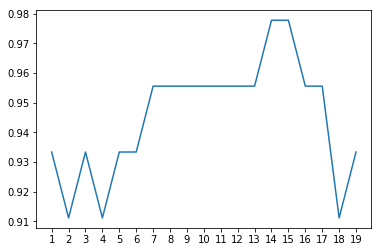

In [28]:
a_index = list(range(1,20))
a = pd.Series()
for i in list(range(1,20)):
    model = KNeighborsClassifier(n_neighbors= i)
    model.fit(train_X,train_y)
    prediction = model.predict(test_X)
    a = a.append(pd.Series( metrics.accuracy_score(test_y,prediction)))
    
plt.plot(a_index,a)
plt.xticks(a_index)


Feature Selection Now 

Use Sepals and Petals data Separately

In [29]:
data.head(2)
data.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [30]:
Sepal = data[['SepalLengthCm', 'SepalWidthCm','Species']]
Petal = data[['PetalLengthCm', 'PetalWidthCm', 'Species']]

In [31]:
Sepal.head(2)

,SepalLengthCm,SepalWidthCm,Species
0,5.1,3.5,Iris-setosa
1,4.9,3.0,Iris-setosa


In [32]:
Petal.head(2)

,PetalLengthCm,PetalWidthCm,Species
0,1.4,0.2,Iris-setosa
1,1.4,0.2,Iris-setosa


In [33]:
sc = StandardScaler()


In [34]:
train_p,test_p = train_test_split(Petal,test_size = 0.3, random_state = 0)
train_x_p = train_p[['PetalLengthCm', 'PetalWidthCm']]
train_y_p = train_p[['Species']]
test_x_p = test_p[['PetalLengthCm', 'PetalWidthCm']]
test_y_p = test_p[['Species']]

In [35]:
train_s,test_s = train_test_split(Sepal,test_size = 0.3, random_state = 0)
train_x_s = train_s[['SepalLengthCm', 'SepalWidthCm']]
train_y_s = train_s[['Species']]
test_x_s = test_s[['SepalLengthCm', 'SepalWidthCm']]
test_y_s = test_s[['Species']]

In [36]:
sc.fit(train_x_p)
sc.fit(train_x_s)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [37]:
train_x_p = sc.transform(train_x_p)
train_x_s = sc.transform(train_x_s)
test_x_p = sc.transform(test_x_p)
test_x_s = sc.transform(test_x_s)

Test Algorithms 

1. SVM 

In [38]:
model_p= svm.SVC()
model_s= svm.SVC()
model_p.fit(train_x_p,train_y_p)
prediction_p = model_p.predict(test_x_p)
model_s.fit(train_x_s,train_y_s)
prediction_s = model_s.predict(test_x_s)
print("The accuracy for Petals SVM is : ", metrics.accuracy_score(test_y_p,prediction_p))
print("The accuracy for Sepals SVM is : ", metrics.accuracy_score(test_y_s,prediction_s))


The accuracy for Petals SVM is :  0.9777777777777777
The accuracy for Sepals SVM is :  0.7777777777777778


/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


2. Logistic Regression

In [39]:
model_p= LogisticRegression()
model_s= LogisticRegression()
model_p.fit(train_x_p,train_y_p)
prediction_p = model_p.predict(test_x_p)
model_s.fit(train_x_s,train_y_s)
prediction_s = model_s.predict(test_x_s)
print("The accuracy for Petals Logistic Regression is : ", metrics.accuracy_score(test_y_p,prediction_p))
print("The accuracy for Sepals Logistic Regression is : ", metrics.accuracy_score(test_y_s,prediction_s))




The accuracy for Petals Logistic Regression is :  0.9333333333333333
The accuracy for Sepals Logistic Regression is :  0.6666666666666666


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A c

3. Decision Tree 

In [40]:
model_p= DecisionTreeClassifier()
model_s= DecisionTreeClassifier()
model_p.fit(train_x_p,train_y_p)
prediction_p = model_p.predict(test_x_p)
model_s.fit(train_x_s,train_y_s)
prediction_s = model_s.predict(test_x_s)
print("The accuracy for Petals Logistic Regression is : ", metrics.accuracy_score(test_y_p,prediction_p))
print("The accuracy for Sepals Logistic Regression is : ", metrics.accuracy_score(test_y_s,prediction_s))




The accuracy for Petals Logistic Regression is :  0.9555555555555556
The accuracy for Sepals Logistic Regression is :  0.6666666666666666


4. KNN 

In [41]:
model_p= KNeighborsClassifier(n_neighbors=8)
model_s= KNeighborsClassifier(n_neighbors=8)
model_p.fit(train_x_p,train_y_p)
prediction_p = model_p.predict(test_x_p)
model_s.fit(train_x_s,train_y_s)
prediction_s = model_s.predict(test_x_s)
print("The accuracy for Petals KNN is : ", metrics.accuracy_score(test_y_p,prediction_p))
print("The accuracy for Sepals KNN is : ", metrics.accuracy_score(test_y_s,prediction_s))




The accuracy for Petals KNN is :  1.0
The accuracy for Sepals KNN is :  0.8


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


Keras Model Check

In [42]:
pd.DataFrame(train_X).head(2)

,0,1,2,3
0,1.019689,-0.089584,0.835126,1.426832
1,-0.752949,-0.795057,0.100624,0.267454


In [43]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [44]:
train_y = encoder.fit_transform(train_y)
test_y = encoder.fit_transform(test_y)
train_y = pd.get_dummies(train_y).values
test_y = pd.get_dummies(test_y).values

In [45]:
# Model Creation
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam

model = Sequential()

model.add(Dense(10,input_shape=(4,),activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(3,activation='softmax'))

model.compile(Adam(lr=0.04),'categorical_crossentropy',metrics=['accuracy'])

model.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                50        
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 21        
Total params: 213
Trainable params: 213
Non-trainable params: 0
_________________________________________________________________


In [46]:
model.fit(train_X,train_y,epochs=30)
y_pred = model.predict(test_X)

y_test_class = np.argmax(test_y,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/30
105/105 [==============================] - 0s 3ms/step - loss: 0.8543 - acc: 0.7524
Epoch 2/30
105/105 [==============================] - 0s 67us/step - loss: 0.4597 - acc: 0.8190
Epoch 3/30
105/105 [==============================] - 0s 54us/step - loss: 0.2771 - acc: 0.9238
Epoch 4/30
105/105 [==============================] - 0s 59us/step - loss: 0.1958 - acc: 0.8762
Epoch 5/30
105/105 [==============================] - 0s 58us/step - loss: 0.1058 - acc: 0.9524
Epoch 6/30
105/105 [==============================] - 0s 59us/step - loss: 0.0633 - acc: 0.9810
Epoch 7/30
105/105 [==============================] - 0s 55us/step - loss: 0.0503 - acc: 0.9810
Epoch 8/30
105/105 [==============================] - 0s 62us/step - loss: 0.0509 - acc: 0.9810
Epoch 9/30
105/105 [==============================] - 0s 67us/step - loss: 0.0258 - acc: 0.9810
Epoch 10/30
105/105 [==============================] - 0s 59us/step - loss: 0.0155 - acc: 0.9905
Epoch 11/30
105/105 [===================